In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.0.1'

# 1. data preparation

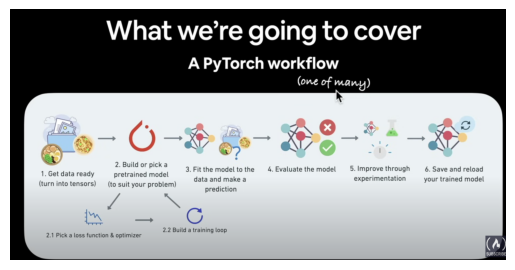

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread('/Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/pytorch_workflow.png') 

plt.axis('off')  # command for hiding the axis. 

# displaying the image 
plt.imshow(testImage) 


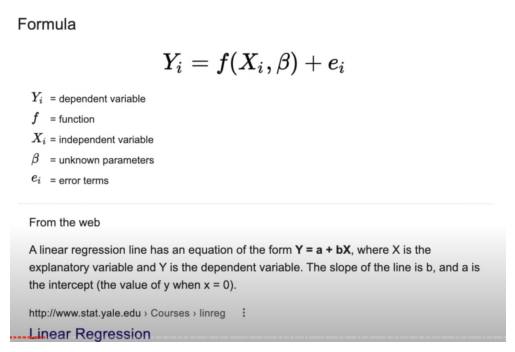

In [4]:
# reading the image 
testImage = img.imread('/Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/Linear_regression_formula.png') 

plt.axis('off')  # command for hiding the axis. 

# displaying the image 
plt.imshow(testImage) 

In [5]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)     #the inverse of the squeeze operation. It is used to add dimensions of size 1 to a tensor.
y = weight * X + bias

print(X.shape)
print(X[:10])
print()

print(y[:10])

torch.Size([50, 1])
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


# 2. split training and test set

In [6]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))           #creates an empty plot of the given size

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

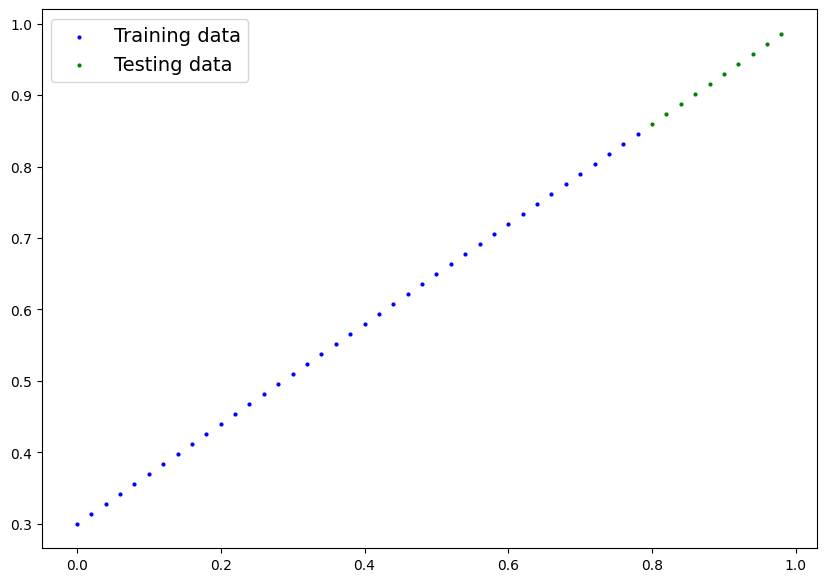

In [8]:
plot_predictions();

# 3. build model

linear regression model 
Y = ax + b
output = input*weight + bias

start with random value
look at training data and adjust the random value to be better represent (or getting closer) by two main algorithms
1. optimizer ex. gradient descent (a type of optimizer) -> /Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/optimizer.png

https://medium.com/analytics-vidhya/this-blog-post-aims-at-explaining-the-behavior-of-different-algorithms-for-optimizing-gradient-46159a97a8c1

2. backpropagation -> /Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/backpropagation.png


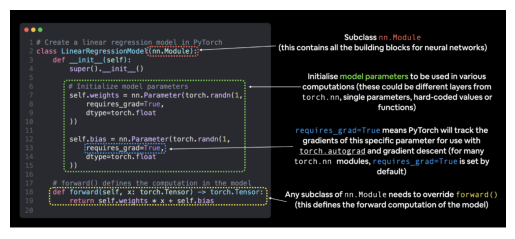

In [9]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 
  
# reading the image 
testImage = img.imread('/Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/buiilding_model.png') 

plt.axis('off')  # command for hiding the axis. 

# displaying the image 
plt.imshow(testImage) 

1. we define a new module class called LinearRegression that inherits from nn.Module.
(So, this class has every method(function) and attribute(variable) of nn.Module )

2. The super() function is used to give access to methods and properties of a parent or sibling class. The super() function returns an object that represents the parent class.

3. Exactly, you don't need to know every method and attribute of nn.Module. Just focus on the important components

In [10]:
# almost everything in pytorch inherits from nn.Modules


class LinearRegressionModel(nn.Module) :    #extend from nn.Module (oop programming) 
    def __init__(self) :
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True) #a flag that controls whether a tensor requires a gradient or not.
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad = True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: #the "->" symbol is used to indicate the return type of a function. 
        return self.weights * x + self.bias
    
    


        

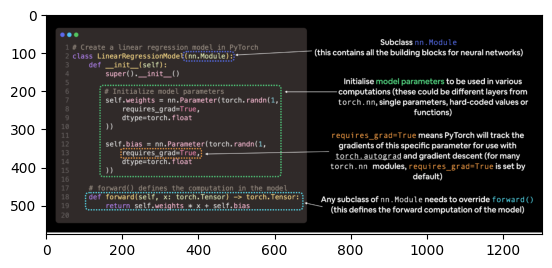

In [11]:
import cv2
path = '/Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/buiilding_model.png'
  
# Reading an image in default mode
image = cv2.imread(path)

plt.imshow(image)

# 4. checking the content of the pytorch model

In [12]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [13]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

# 5. making prediction using torch.inference_mode()

when we feed the data to the model the data will go through forward method of the model

In [14]:
with torch.inference_mode() :           #turn of gradient tracking (from requires_grad = True) (make it much more faster)
    y_preds = model_0(X_test)

In [15]:
print(X_test)
print()

print(y_preds)

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


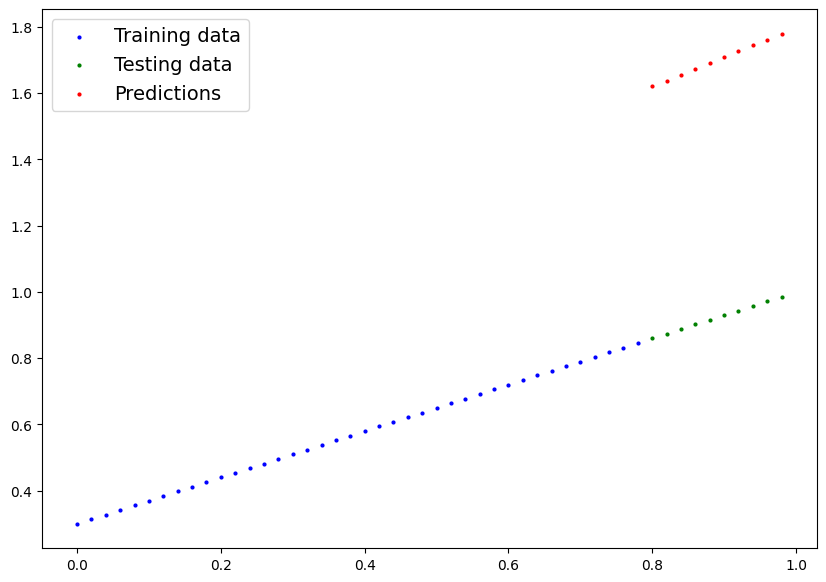

In [16]:
plot_predictions(predictions = y_preds)

# 6. train the model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in the other words from a poor representation of the data to a better representation of the data

one way to measure is by using loss function

loss function -> Measures how wrong your models predictions (e.g. y_preds) https://pytorch.org/docs/stable/nn.html#loss-functions           
https://neptune.ai/blog/pytorch-loss-functions

optimizer -> takes into account the loss of a model and adjust model parameters e.g. weight/bias https://pytorch.org/docs/stable/optim.html   
https://analyticsindiamag.com/ultimate-guide-to-pytorch-optimizers/

In [17]:
loss_fn = nn.L1Loss() # MAE loss

#create optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

A couple of things we need in a training loop: **

0. Loop through the data
1. Forward pass (this involves data moving through our model's 'forward()' function)
2. Calculation loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjsut our model's parameters to improve the loss


here is standard training step of pytorch model

In [18]:
print(model_0.parameters)
print(list(model_0.parameters()))

<bound method Module.parameters of LinearRegressionModel()>
[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([0.9150], requires_grad=True)]


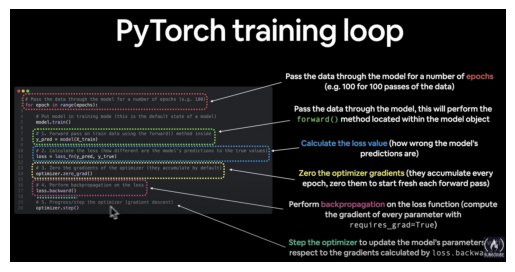

In [19]:
# reading the image 
testImage = img.imread('/Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/training_loop.png') 

plt.axis('off')  # command for hiding the axis. 

# displaying the image 
plt.imshow(testImage) 

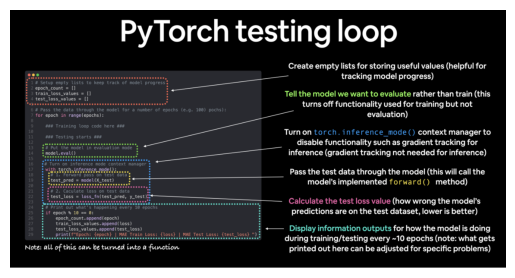

In [20]:
# reading the image 
testImage = img.imread('/Users/sirasittanrattanawong/Downloads/Fundamental_AI_Tutorial/AI_Tutorial_Fundamental/basic_ML_and_Deeplearning/Basic_Knowledge/image/testing_loop.png') 

plt.axis('off')  # command for hiding the axis. 

# displaying the image 
plt.imshow(testImage) 

In [21]:
# building a training loop and a testing loop

epochs = 100

#craete empty loss lists to track the value
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs) :
    #put model in training mode (default)
    model_0.train()
    
    #1. forward pass on training data
    y_pred = model_0(X_train)
    
    #2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train) # from loss_fn = nn.L1Loss() # MAE loss
    
    #3. Zero grad optimizer
    optimizer.zero_grad()       #from optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
    
    #4. Loss backwards
    loss.backward()             #from loss_fn = nn.L1Loss() # MAE loss,   from loss = loss_fn(y_pred, y_train) ##back propagation
    
    #5. progress the optimizer
    optimizer.step()            #from optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
    
    
    
    
    
    
    
    
    
    
    #testing loop
    
    #put the model in evaluation mode
    model_0.eval()
    
    with torch.inference_mode() : #turn off gradient tracking. It will reduce memory consumption for computations.
        #1. Forward pass on training data
        test_pred = model_0(X_test)
        
        #2. calculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        
        #print out what happening
        if epoch % 10 == 0 :
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())     #convert to numpy
            test_loss_values.append(loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    

Epoch: 0 | MAE Train Loss: 0.6860889196395874 | MAE Test Loss: 0.7637526988983154 
Epoch: 10 | MAE Train Loss: 0.5708791017532349 | MAE Test Loss: 0.6290428042411804 
Epoch: 20 | MAE Train Loss: 0.45566922426223755 | MAE Test Loss: 0.4943329691886902 
Epoch: 30 | MAE Train Loss: 0.340459406375885 | MAE Test Loss: 0.35962313413619995 
Epoch: 40 | MAE Train Loss: 0.22524945437908173 | MAE Test Loss: 0.2249133139848709 
Epoch: 50 | MAE Train Loss: 0.1100396141409874 | MAE Test Loss: 0.09020347893238068 
Epoch: 60 | MAE Train Loss: 0.009724984876811504 | MAE Test Loss: 0.020998019725084305 
Epoch: 70 | MAE Train Loss: 0.006216756068170071 | MAE Test Loss: 0.014099234715104103 
Epoch: 80 | MAE Train Loss: 0.002788323210552335 | MAE Test Loss: 0.005826681852340698 
Epoch: 90 | MAE Train Loss: 0.007095950189977884 | MAE Test Loss: 0.00754010071977973 


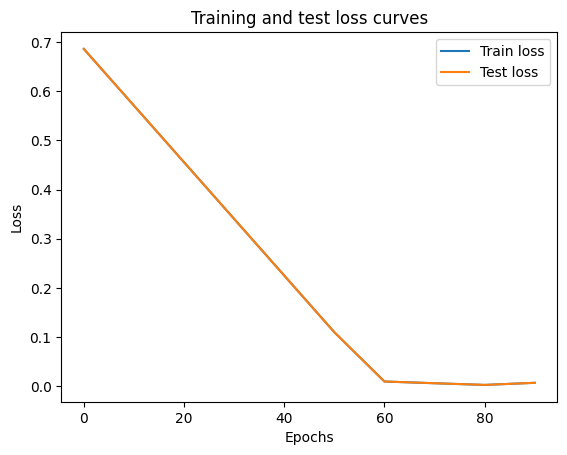

In [22]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [23]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


# 7. Making predictions with a trained PyTorch model (inference)

In [24]:
#set model in evaluation mode
model_0.eval()

#setup the inference mode context manager
with torch.inference_mode() :
    y_preds = model_0(X_test)
    
y_preds


tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

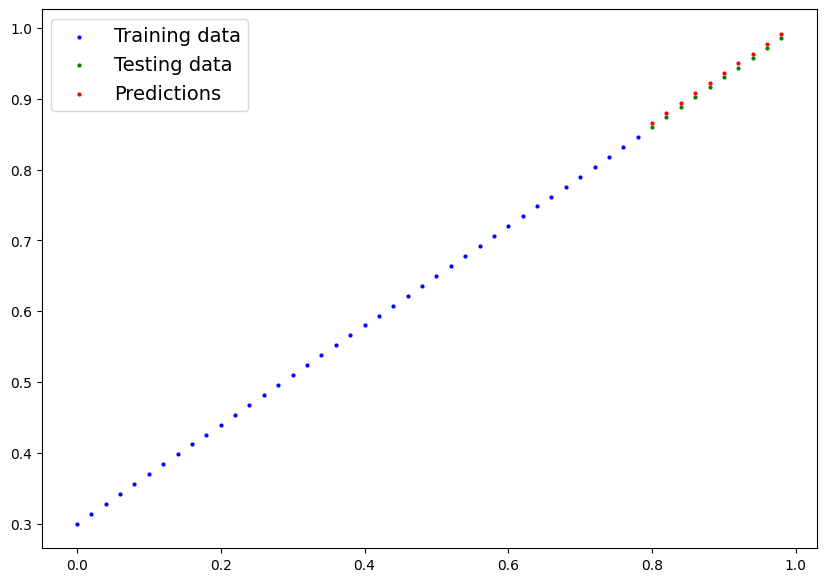

In [25]:
plot_predictions(predictions = y_preds)

# 8. saving a pytorch model's state_dict()

There are 3 main methods about saving the model
1. torch.save() -> save a pytorch object in python's pickle format (save the entire model)
2. torch.load() -> load a saved pytorch object
3. torch.nn.Module.load_state_dict() -> load a model saved staet dictionary

what is state_dict -> a simple python dictionary object which is used for saving or loading models from PyTorch

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [27]:
#save the entire model

from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


Loading a saved PyTorch model's state_dict()

In [28]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [30]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 9. putting them all(1-8) together using cpu

1. loss
2. optimizer (gradient descent is a type of optimizer)
3. backpropagation

## 9.0 import + device 

In [31]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1'

In [32]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


## 9.1 Data

In [33]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [34]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

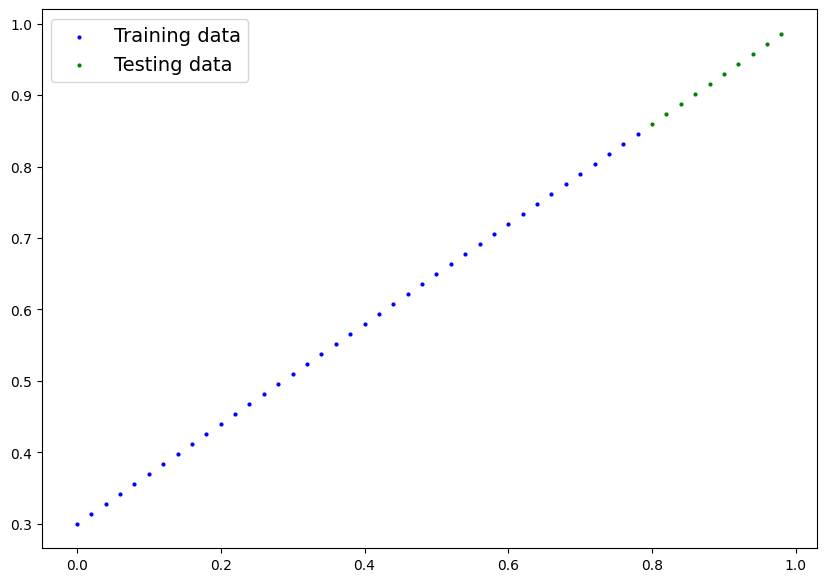

In [35]:
# Note: If you've reset your runtime, this function won't work, 
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

## 9.2 Building a PyTorch linear model (use a little different syntax from above)

In [36]:
#superclass -> nn.Module
#subclass -> LinearRegressionModelV2
#super().__init__() -> calling the initialization method of the superclass nn.Module
#nn.Linear() -> https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear




class LinearRegressionModelV2(nn.Module): #extend from nn.Module (oop programming) 
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:   #the -> int just tells that f() returns an integer (but it doesn't force the function to return an integer). It is called a return annotation so -> is not necessary
        return self.linear_layer(x) 

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)   # there is a torch in LinearRegressionModelV2 class
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
print(model_1.parameters())

<generator object Module.parameters at 0x145545850>


In [38]:
# Check model device

# this is how to check model parameter device you can search it. The syntax is using next()

next(model_1.parameters()).device

device(type='cpu')

In [39]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cpu')

## 9.3 Training

loss function -> Measures how wrong your models predictions (e.g. y_preds) https://pytorch.org/docs/stable/nn.html#loss-functions           
https://neptune.ai/blog/pytorch-loss-functions

optimizer -> takes into account the loss of a model and adjust model parameters e.g. weight/bias https://pytorch.org/docs/stable/optim.html   
https://analyticsindiamag.com/ultimate-guide-to-pytorch-optimizers/

Let's use the same functions we used earlier, nn.L1Loss() and torch.optim.SGD().

We'll have to pass the new model's parameters (model.parameters()) to the optimizer for it to adjust them during training.

The learning rate of 0.01 worked well before too so let's use that again.

In [40]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize newly created model's parameters
                            lr=0.01)

PyTorch training loop steps **
1. Forward pass - The model goes through all of the training data once, performing its  forward() function calculations (model(x_train)).
2. Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
3. Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
4. Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
5. Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [41]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward() #back propagation

    # 5. Step the optimizer
    optimizer.step()









    ### Testing loop
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215679459273815 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904


In [42]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


## 9.4 Making predictions

In [43]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

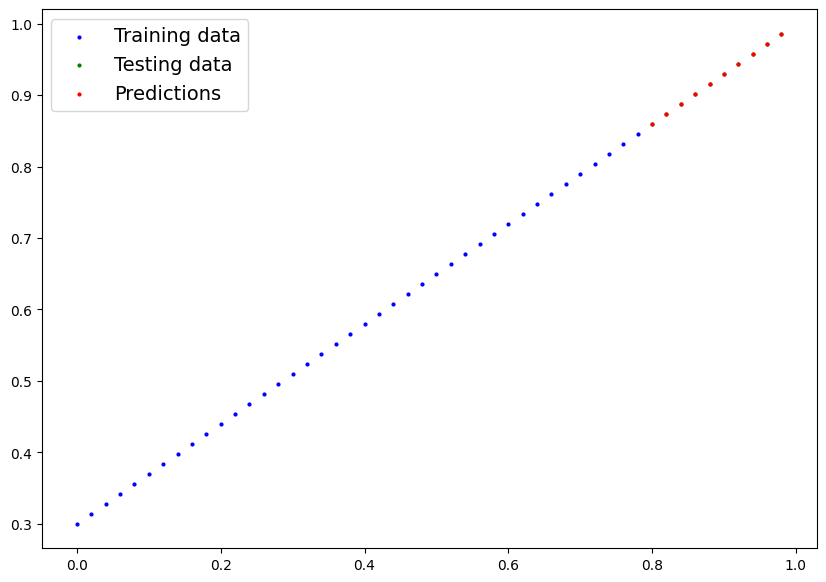

In [44]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

## 9.5 Saving and loading a model

 9.5 Saving and loading a model

In [45]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


In [46]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [47]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])